<a href="https://colab.research.google.com/github/jash-ai/PYTHON/blob/main/PySpark%20for%20Data%20Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##https://www.kdnuggets.com/2023/02/pyspark-data-science.html
##google colab

## **PySpark for Data Science**

In [1]:
%pip install pyspark py4j -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 15.2 MB/s eta 0:00:00


After that, we will need to provide the session name to initialize the Spark session.

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('PySpark_for_DataScience').getOrCreate()

**Importing the Data using PySpark**

In this tutorial, we will be using Global Spotify Weekly Chart from Kaggle. It contains information about the artist and the songs on the Spotify global weekly chart.

Just like Pandas, we can load the data from CSV to dataframe using spark.read.csv function and display Schema using printSchema() function.

DOWNLOAD FILE FROM:
https://www.kaggle.com/datasets/kabhishm/global-spotify-weekly-chart

In [ ]:
## COPY THE FILE AND ADD IT TO GOOGLE COLAB FILE SECTION

In [4]:
df = spark.read.csv(
    '/content/spotify_weekly_chart.csv',
    sep = ',',
    header = True,
    )

df.printSchema()

root
 |-- Pos: string (nullable = true)
 |-- P+: string (nullable = true)
 |-- Artist: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- Wks: string (nullable = true)
 |-- Pk: string (nullable = true)
 |-- (x?): string (nullable = true)
 |-- Streams: string (nullable = true)
 |-- Streams+: string (nullable = true)
 |-- Total: string (nullable = true)



Output:

As we can observe, PySpark has loaded all of the columns as a string. To perform exploratory data analysis, we need to change the Schema.

**Updating the Schema**

To change the schema, we need to create a new data schema that we will add to StructType function. You need to make sure that each column field is getting the right data type. 

In [5]:
from pyspark.sql.types import *

data_schema = [
               StructField('Pos', IntegerType(), True),
               StructField('P+', StringType(), True),
               StructField('Artist', StringType(), True),
               StructField('Title', StringType(), True),
               StructField('Wks', IntegerType(), True),
               StructField('Pk', IntegerType(), True),
               StructField('(x?)', StringType(), True),
               StructField('Streams', IntegerType(), True),
               StructField('Streams+', DoubleType(), True),
               StructField('Total', IntegerType(), True),
            ]

final_struc = StructType(fields = data_schema)

Then, we will load the CSV files using extra argument schema. After that, we will print the schema to check if the correct changes were made.

In [6]:
df = spark.read.csv(
    '/content/spotify_weekly_chart.csv',
    sep = ',',
    header = True,
    schema = final_struc ##EXTRA BIT ADDED TO CHECK THE SCHEMA
    )

df.printSchema()

root
 |-- Pos: integer (nullable = true)
 |-- P+: string (nullable = true)
 |-- Artist: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- Wks: integer (nullable = true)
 |-- Pk: integer (nullable = true)
 |-- (x?): string (nullable = true)
 |-- Streams: integer (nullable = true)
 |-- Streams+: double (nullable = true)
 |-- Total: integer (nullable = true)



**Output:**

As we can see, we have different data types for the columns. 

**Exploring the Data**

You can explore your data as a dataframe by using toPandas() function.

Note: we have used limit to display the first five rows. It is similar to SQL commands. This means that we can use PySpark Python API for SQL command to run queries

In [7]:
df.limit(5).toPandas()

,Pos,P+,Artist,Title,Wks,Pk,(x?),Streams,Streams+,Total
0,1,=,Miley Cyrus,Flowers,6,1,6,61763072,-9016633.0,528646130
1,2,=,SZA,Kill Bill,11,1,2,46549077,-2452314.0,510454785
2,3,+1,PinkPantheress,Boy's a liar Pt. 2,3,3,1,39172306,7520136.0,83824655
3,4,-1,Bizarrap,"Shakira: Bzrp Music Sessions, Vol. 53",7,2,3,34781301,-3881780.0,335240889
4,5,=,Harry Styles,As It Was,47,1,11,29532543,-1523395.0,1924932123


Just like pandas, we can use describe() function to display a summary of data distribution. 

In [8]:
df.describe().show()

+-------+------------------+-------------------+-----------+------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|summary|               Pos|                 P+|     Artist| Title|              Wks|               Pk|              (x?)|          Streams|          Streams+|              Total|
+-------+------------------+-------------------+-----------+------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|  count|               200|                200|        200|   200|              200|              200|                32|              200|               185|                192|
|   mean|             100.5|-3.3257142857142856|       null| 505.0|           44.775|            42.68|           4.40625|   1.1778173855E7|-516817.8864864865|       3.85947391E8|
| stddev|57.879184513951124| 17.479122897737746|       null|  null|62.69367479496223|42.722401829607

The count() function used for displaying number of rows. Read Pandas API on Spark to learn about similar APIs.

https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/index.html

In [9]:
##NUMBER OF ROWS
df.count()

200

**Column Manipulation**

You can rename your column by using **withColumnRenamed** function. It requires an old name and a new name as string. 

In [10]:
##HERE WE ARE RENAMING Pos to Rank (which is the first column)
df = df.withColumnRenamed('Pos', 'Rank')

df.show(5)

+----+---+---------------+--------------------+---+---+----+--------+----------+----------+
|Rank| P+|         Artist|               Title|Wks| Pk|(x?)| Streams|  Streams+|     Total|
+----+---+---------------+--------------------+---+---+----+--------+----------+----------+
|   1|  =|   Miley Cyrus |             Flowers|  6|  1|   6|61763072|-9016633.0| 528646130|
|   2|  =|           SZA |           Kill Bill| 11|  1|   2|46549077|-2452314.0| 510454785|
|   3| +1|PinkPantheress |  Boy's a liar Pt. 2|  3|  3|   1|39172306| 7520136.0|  83824655|
|   4| -1|      Bizarrap |Shakira: Bzrp Mus...|  7|  2|   3|34781301|-3881780.0| 335240889|
|   5|  =|  Harry Styles |           As It Was| 47|  1|  11|29532543|-1523395.0|1924932123|
+----+---+---------------+--------------------+---+---+----+--------+----------+----------+
only showing top 5 rows



To drop single or multiple columns, you can use **drop()** function

In [11]:
##THE COLUMNS DROPPED ARE 'P+','Pk','(x?)','Streams+'

df = df.drop('P+','Pk','(x?)','Streams+')

df.show(5)


+----+---------------+--------------------+---+--------+----------+
|Rank|         Artist|               Title|Wks| Streams|     Total|
+----+---------------+--------------------+---+--------+----------+
|   1|   Miley Cyrus |             Flowers|  6|61763072| 528646130|
|   2|           SZA |           Kill Bill| 11|46549077| 510454785|
|   3|PinkPantheress |  Boy's a liar Pt. 2|  3|39172306|  83824655|
|   4|      Bizarrap |Shakira: Bzrp Mus...|  7|34781301| 335240889|
|   5|  Harry Styles |           As It Was| 47|29532543|1924932123|
+----+---------------+--------------------+---+--------+----------+
only showing top 5 rows



You can use **.na** for dealing with missing valuse. In our case, we are dropping all missing values rows. 

In [12]:
df = df.na.drop()
## Or
#data.na.replace(old_value, new_vallue)

# Data **Analysis** 

For data analysis, we will be using PySpark API to translate SQL commands. In the first example, we are selecting three columns and display the top 5 rows. 

In [13]:
##SHOW THE TOP 5 ROWS FOR THE COLUMNS: 'Artist', 'Artist', 'Total'
df.select(['Artist', 'Artist', 'Total']).show(5)

+---------------+---------------+----------+
|         Artist|         Artist|     Total|
+---------------+---------------+----------+
|   Miley Cyrus |   Miley Cyrus | 528646130|
|           SZA |           SZA | 510454785|
|PinkPantheress |PinkPantheress |  83824655|
|      Bizarrap |      Bizarrap | 335240889|
|  Harry Styles |  Harry Styles |1924932123|
+---------------+---------------+----------+
only showing top 5 rows



In [21]:
##shows column Wks between 25 to 40
df.filter(df.Wks.between(25, 40)).show()

+----+---------------+--------------------+---+--------+----------+
|Rank|         Artist|               Title|Wks| Streams|     Total|
+----+---------------+--------------------+---+--------+----------+
|   9| Manuel Turizo |          La Bachata| 34|23186047| 846097336|
|  10|  David Guetta |     I'm Good (Blue)| 26|22894913| 720903885|
|  11|          Rema |           Calm Down| 26|22203214| 450018480|
|  19|      Bizarrap |Quevedo: Bzrp Mus...| 33|17919127|1038380457|
|  21|          JVKE |         golden hour| 26|17765736| 400095833|
|  25|   OneRepublic |     I Ain't Worried| 38|16373032| 735941599|
|  28|Arctic Monkeys |    I Wanna Be Yours| 33|15951368| 431611710|
|  32|          Feid |Feliz Cumpleaños ...| 27|15699791| 339141750|
|  44|          d4vd |   Romantic Homicide| 25|13849720| 374978264|
|  48|   Chris Brown | Under The Influence| 31|13325722| 590537056|
|  50|       Beyoncé |             CUFF IT| 27|12993495| 387588573|
|  57|    Steve Lacy |           Bad Habit| 33|1

For more complex queries, we will filter values where ‘Total’ is greater than or equal to 600 million to 700 million. 

Note: you can also use df.Total.between(600000000, 700000000) to filter out records.

lit = Creates a Column of literal value

In [14]:
from pyspark.sql.functions import col, lit, when

df.filter(
    (col("Total") >= lit("600000000")) & (col("Total") <= lit("700000000"))
).show(5)

+----+-----------+-------------------+---+--------+---------+
|Rank|     Artist|              Title|Wks| Streams|    Total|
+----+-----------+-------------------+---+--------+---------+
|  12|The Weeknd |        Die For You| 58|21655432|664741027|
|  57|Steve Lacy |          Bad Habit| 33|12458884|604464538|
|  99|    Eminem |         Without Me| 87| 9450373|628174551|
| 114|   KAROL G |           PROVENZA| 44| 9026567|691040730|
| 135|    Eminem |The Real Slim Shady| 90| 8423035|610347150|
+----+-----------+-------------------+---+--------+---------+
only showing top 5 rows



Write if/else statement to create a categorical column using when function.

In [16]:
##IF COLUMN Wks IS GREATER THAN OR = 35 THEN 1 ELSE 0
df.select('Artist', 'Title','Wks',
            when(df.Wks >= 35, 1).otherwise(0)
           ).show(5)

+---------------+--------------------+---+---------------------------------------+
|         Artist|               Title|Wks|CASE WHEN (Wks >= 35) THEN 1 ELSE 0 END|
+---------------+--------------------+---+---------------------------------------+
|   Miley Cyrus |             Flowers|  6|                                      0|
|           SZA |           Kill Bill| 11|                                      0|
|PinkPantheress |  Boy's a liar Pt. 2|  3|                                      0|
|      Bizarrap |Shakira: Bzrp Mus...|  7|                                      0|
|  Harry Styles |           As It Was| 47|                                      1|
+---------------+--------------------+---+---------------------------------------+
only showing top 5 rows



In [15]:
df.select('Artist', 'Title', 
            when(df.Wks >= 35, 1).otherwise(0)
           ).show(5)

+---------------+--------------------+---------------------------------------+
|         Artist|               Title|CASE WHEN (Wks >= 35) THEN 1 ELSE 0 END|
+---------------+--------------------+---------------------------------------+
|   Miley Cyrus |             Flowers|                                      0|
|           SZA |           Kill Bill|                                      0|
|PinkPantheress |  Boy's a liar Pt. 2|                                      0|
|      Bizarrap |Shakira: Bzrp Mus...|                                      0|
|  Harry Styles |           As It Was|                                      1|
+---------------+--------------------+---------------------------------------+
only showing top 5 rows



You can use all of the SQL commands as Python API to run a complete query. 

In [17]:
##SHOW 3 COLUMN Artist','Wks','Total' GROUP BY Artist MEAN VALUE AND ORDER BY ['avg(Total)'] HIGHEST FIRST AND SHOW 5 RECORDS
df.select(['Artist','Wks','Total'])\
        .groupBy('Artist')\
        .mean()\
        .orderBy(['avg(Total)'], ascending = [False])\
        .show(5)

+------------------+--------+--------------------+
|            Artist|avg(Wks)|          avg(Total)|
+------------------+--------+--------------------+
|    Billie Eilish |   253.0|       2.089105993E9|
|     James Arthur |   289.0|       1.975186494E9|
|     Harry Styles |    86.0|1.5296280663333333E9|
|The Neighbourhood |   155.0|       1.427743967E9|
|       Elton John |    80.0|       1.378850227E9|
+------------------+--------+--------------------+
only showing top 5 rows



# **Data Visualization**

Let’s take above query and try to display it as a bar chart. We are plotting “artists v.s average song streams” and we are only displaying the top seven artists. 

It is awesome, if you ask me. 

<AxesSubplot:xlabel='Artist', ylabel='Average Average Streams'>

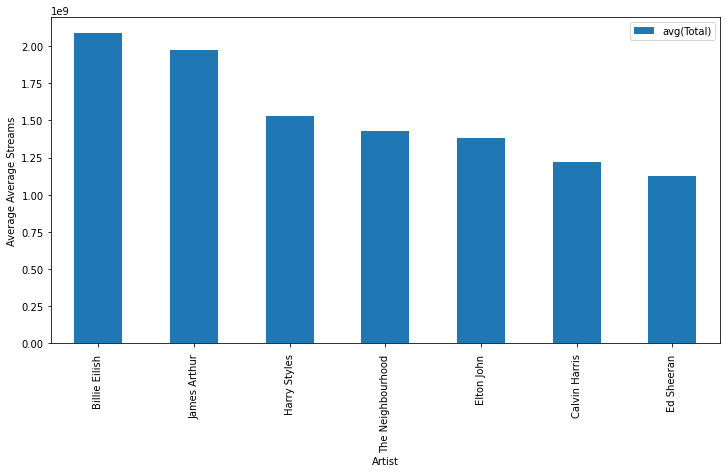

In [18]:
vis_df = (
    df.select(["Artist", "Wks", "Total"])
    .groupBy("Artist")
    .mean()
    .orderBy(["avg(Total)"], ascending=[False])
    .toPandas()
)

vis_df.iloc[0:7].plot(
    kind="bar",
    x="Artist",
    y="avg(Total)",
    figsize=(12, 6),
    ylabel="Average Average Streams",
)

# **Saving the Result**

After processing the data and running analysis, it is the time for saving the results. 

You can save the results in all of the popular file types, such as CSV, JSON, and Parquet. 

In [19]:
##final_data is the frame collected to store the data
final_data = (
    df.select(["Artist", "Wks", "Total"])
    .groupBy("Artist")
    .mean()
    .orderBy(["avg(Total)"], ascending=[False])
)

# CSV
final_data.write.csv("dataset.csv")

# JSON
final_data.write.save("dataset.json", format="json")

# Parquet
final_data.write.save("dataset.parquet", format="parquet")

# **Data Pre-Processing**

In this section, we are preparing the data for the machine learning model. 

1) Categorical Encoding: converting the categorical 
columns into integers using StringIndexer.
2) Assembling Features: assembling important features into one vector column. 
3) Scaling: scaling the data using the StandardScaler scaling function. 

In [20]:
from pyspark.ml.feature import (
    VectorAssembler,
    StringIndexer,
    OneHotEncoder,
    StandardScaler,
)

## Categorical Encoding
indexer = StringIndexer(inputCol="Artist", outputCol="Encode_Artist").fit(
    final_data
)
encoded_df = indexer.transform(final_data)

## Assembling Features
assemble = VectorAssembler(
    inputCols=["Encode_Artist", "avg(Wks)", "avg(Total)"],
    outputCol="features",
)

assembled_data = assemble.transform(encoded_df)

## Standard Scaling
scale = StandardScaler(inputCol="features", outputCol="standardized")
data_scale = scale.fit(assembled_data)
data_scale_output = data_scale.transform(assembled_data)
data_scale_output.show(5)
 

+------------------+--------+--------------------+-------------+--------------------+--------------------+
|            Artist|avg(Wks)|          avg(Total)|Encode_Artist|            features|        standardized|
+------------------+--------+--------------------+-------------+--------------------+--------------------+
|    Billie Eilish |   253.0|       2.089105993E9|         10.0|[10.0,253.0,2.089...|[0.26958193300859...|
|     James Arthur |   289.0|       1.975186494E9|         43.0|[43.0,289.0,1.975...|[1.15920231193696...|
|     Harry Styles |    86.0|1.5296280663333333E9|         35.0|[35.0,86.0,1.5296...|[0.94353676553008...|
|The Neighbourhood |   155.0|       1.427743967E9|        109.0|[109.0,155.0,1.42...|[2.93844306979369...|
|       Elton John |    80.0|       1.378850227E9|         28.0|[28.0,80.0,1.3788...|[0.75482941242406...|
+------------------+--------+--------------------+-------------+--------------------+--------------------+
only showing top 5 rows



# **Kmean Elbow Method**

In [22]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import numpy as np

cost = np.zeros(10)

evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='standardized',metricName='silhouette', distanceMeasure='squaredEuclidean')

for i in range(2,10):
    KMeans_algo=KMeans(featuresCol='standardized', k=i)
    KMeans_fit=KMeans_algo.fit(data_scale_output)
    output=KMeans_fit.transform(data_scale_output)
    cost[i] = KMeans_fit.summary.trainingCost

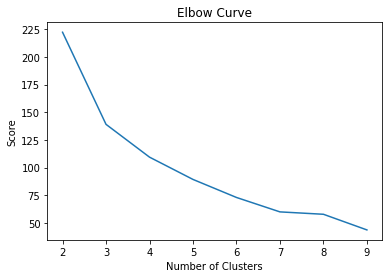

In [23]:
import pandas as pd
import pylab as pl
df_cost = pd.DataFrame(cost[2:])
df_cost.columns = ["cost"]
new_col = range(2,10)
df_cost.insert(0, 'cluster', new_col)
pl.plot(df_cost.cluster, df_cost.cost)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# **KMeans Clustering**

I have already run the Kmean elbow method to find k. If you want to see all of the code sources with the output, you can check out my notebook.

Just like scikit-learn, we will provide a number of clusters and train the Kmeans clustering model. 

In [24]:
from pyspark.ml.clustering import KMeans
KMeans_algo=KMeans(featuresCol='standardized', k=4)
KMeans_fit=KMeans_algo.fit(data_scale_output)
preds=KMeans_fit.transform(data_scale_output)

preds.show(5)

+------------------+--------+--------------------+-------------+--------------------+--------------------+----------+
|            Artist|avg(Wks)|          avg(Total)|Encode_Artist|            features|        standardized|prediction|
+------------------+--------+--------------------+-------------+--------------------+--------------------+----------+
|    Billie Eilish |   253.0|       2.089105993E9|         10.0|[10.0,253.0,2.089...|[0.26958193300859...|         1|
|     James Arthur |   289.0|       1.975186494E9|         43.0|[43.0,289.0,1.975...|[1.15920231193696...|         1|
|     Harry Styles |    86.0|1.5296280663333333E9|         35.0|[35.0,86.0,1.5296...|[0.94353676553008...|         3|
|The Neighbourhood |   155.0|       1.427743967E9|        109.0|[109.0,155.0,1.42...|[2.93844306979369...|         1|
|       Elton John |    80.0|       1.378850227E9|         28.0|[28.0,80.0,1.3788...|[0.75482941242406...|         3|
+------------------+--------+--------------------+------

# **Visualizing Predictions**

**Model Evaluation**

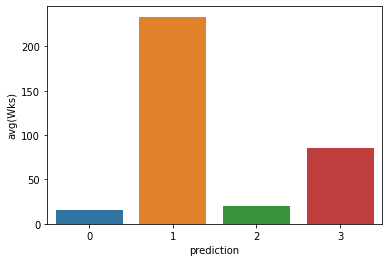

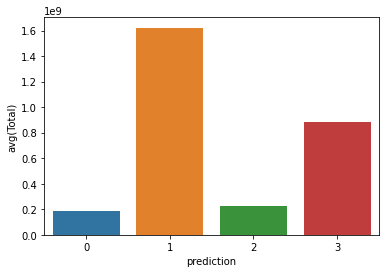

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

df_viz = preds.select('Artist', 'avg(Wks)','avg(Total)','prediction').toPandas()
avg_df = df_viz.groupby(['prediction'], as_index=False).mean()

list1 = ['avg(Wks)','avg(Total)']

for i in list1:
    sns.barplot(x='prediction',y=str(i),data=avg_df)
    plt.show()

In this part, we will be using a matplotlib.pyplot.barplot to display the distribution of 4 clusters. 

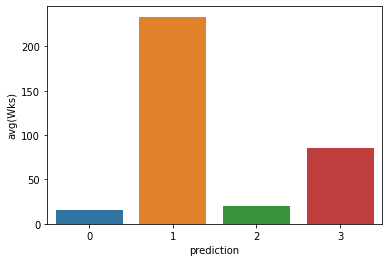

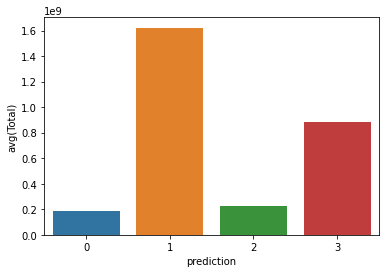

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

df_viz = preds.select(
    "Artist", "avg(Wks)", "avg(Total)", "prediction"
).toPandas()
avg_df = df_viz.groupby(["prediction"], as_index=False).mean()

list1 = ["avg(Wks)", "avg(Total)"]

for i in list1:
    sns.barplot(x="prediction", y=str(i), data=avg_df)
    plt.show()

# **Wrapping Up**

In this tutorial, I have given an overview of what you can do using PySpark API. The API allows you to perform SQL-like queries, run pandas functions, and training models similar to sci-kit learn. You get the best of all worlds with distributed computing. 

It outshines a lot of Python packages when dealing with large datasets (>1GB). If you are a programmer and just interested in Python code, check our Google Colab notebook. You just have to download and add the data from Kaggle to start working on it.

Do let me know in the comments, if you want me to keep writing code based-tutorials for other Python libraries.